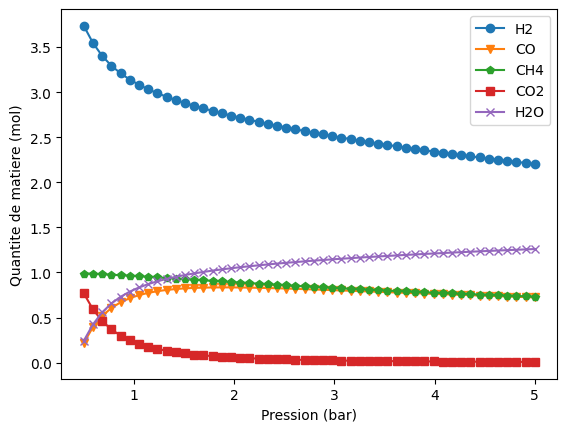

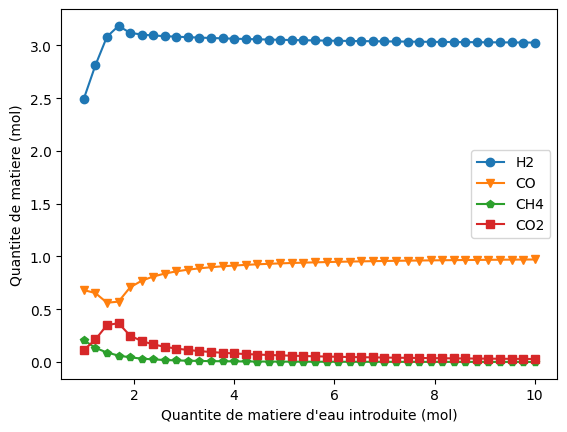

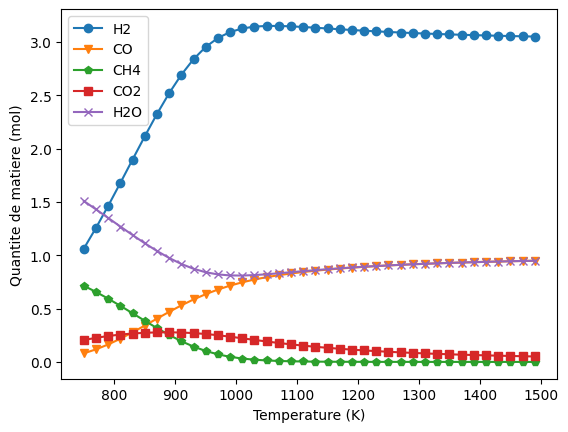

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
from math import exp


## Constantes d'equilibre


def K1(T): 
    # Reaction 1 : CH4 + H2O = CO + 3H2
    return exp(-24780/T+25.63) # Renvoie la valeur de K1 a la temperature T
    
def K2(T):
    # Reaction 2 : CO + H2O = CO2 + H2
    return exp(4934/T-5.17)    # Renvoie la valeur de K2 a la temperature T

## Quotients reactionnels
# Reaction 1 : CH4 + H2O = CO + 3H2 avancement ksi1
# Reaction 2 : CO + H2O = CO2 + H2 avancement ksi2

def Qr1(ksi1,ksi2,nH2Oi,P):
    # Renvoie la valeur du quotient reactionnel de la reaction 1  
    # pour les avancements ksi1 et ksi2, pour une pression totale P (en bars)
    # et pour les quantites de matiere initiales : 1 mol de CH4 et nH2Oi mol d'eau 
    
    return (((ksi1**4)/((1+nH2Oi)**2))*P**2) / ((1-ksi1)*(nH2Oi-ksi1))
    
def Qr2(ksi1,ksi2,nH2Oi,P):
    # Renvoie la valeur du quotient reactionnel de la reaction 2 
    # pour les avancements ksi1 et ksi2, pour une pression totale P (en bars) 
    # et pour les quantites de matiere initiales : 1 mol de CH4 et nH2Oi mol d'eau 

    return ((3*ksi1+ksi2)*ksi2)*P**2 / (ksi1-ksi2)*(nH2Oi-ksi1-ksi2) 

    
## Determination des avancements a l'equilibre : resolution du systeme d'equations

def f(ksi):
    # Prend en argument la liste [ksi1,ksi2] et renvoie la liste [Qr1-K1,Qr2-K2]
    # chercher l'avancement a l'equilibre revient a chercher le zero de Q - K 
    
    return [Qr1(ksi[0],ksi[1],nH2Oi,P)-K1(T),Qr2(ksi[0],ksi[1],nH2Oi,P)-K2(T)]

## Trace des quantites de matiere a l'equilibre en fonction de la pression à 1000 K

T = 1000 # Choix de la temperature d'etude
nH2Oi = 2   # pour 2 mol d'eau au depart
press = np.linspace(0.5,5,50) # liste des pressions entre 0,5 et 5 bar

# initialisation des listes de resultats (quantites de matiere des differentes especes)
nH2 = []
nCH4 = []
nCO2=[]
nCO = []
nH2O=[]

# valeurs de depart de ksi1 et ksi2 utilisees pour le calcul numerique 
val_depart =[0.9,0.001]

for P in press:
    [ksi1,ksi2] = op.root(f,val_depart).x # resolution numerique 
    #======Completés avec les valeurs de "l'etat final"
    # calcul et stockage des quantites de matiere
    nH2.append(3*ksi1+ksi2)
    nCH4.append(1*ksi1)
    nCO.append(ksi1-ksi2)
    nCO2.append(ksi2)
    nH2O.append(nH2Oi-ksi1-ksi2)
    
    val_depart = [ksi1,ksi2] # le calcul numerique suivant partira des avancement calcules au point precedent
    

# Trace du graphique (quantites de matiere en fonction de la pression totale)
plt.figure(1)
plt.xlabel('Pression (bar)')
plt.ylabel('Quantite de matiere (mol)')
plt.plot(press,nH2,marker = 'o',label='H2')
plt.plot(press,nCO,marker = 'v',label='CO')
plt.plot(press,nCH4,marker = 'p',label='CH4')
plt.plot(press,nCO2,marker = 's',label='CO2')
plt.plot(press,nH2O,marker = 'x',label='H2O')
plt.legend()
plt.savefig('pression.png') # Enregistrement du graphique dans un fichier image
plt.show()


### Trace des quantites de matiere a l'equilibre en fonction de la quantite d'eau
# P = 1 bar T = 1000 K
# nH2O initial compris entre 1 mol et 10 mol

T = 1000 # Choix de la temperature d'etude
P = 1 # Choix de la pression d'etude

nH2O = np.linspace(1,10,40) # liste des valeurs de quantite de matiere initiale d'eau
# initialisation des listes de resultats (quantites de matiere des differentes especes)
nH2 = []
nCH4 = []
nCO2=[]
nCO = []

# valeurs de depart de ksi1 et ksi2 utilisees pour le calcul numerique 
val_depart =[0.6,0.1] 


for nH2Oi in nH2O:
    [ksi1,ksi2] = op.root(f,val_depart).x # resolution numerique 
    
    # calcul et stockage des quantites de matiere
    nH2.append(3*ksi1+ksi2)
    nCH4.append(1-ksi1)
    nCO.append(ksi1-ksi2)
    nCO2.append(ksi2)
    
    val_depart = [ksi1,ksi2] # le calcul numerique suivant partira des avancement calcules au point precedent
    
# Trace des graphiques
plt.figure(2)
plt.xlabel("Quantite de matiere d'eau introduite (mol)")
plt.ylabel('Quantite de matiere (mol)')
plt.plot(nH2O,nH2,marker = 'o',label='H2')
plt.plot(nH2O,nCO,marker = 'v',label='CO')
plt.plot(nH2O,nCH4,marker = 'p',label='CH4')
plt.plot(nH2O,nCO2,marker = 's',label='CO2')
plt.legend()
plt.savefig('eau.png') # Sauvegarde du graphique dans un fichier image
plt.show()

## Trace des quantites de matiere a l'equilibre en fonction de la temperature
# P = 1 bar et pour 2 mol d'eau au depart
# T entre 750 et 1500 K

P = 1 # choix de la pression d'etude
nH2Oi = 2 # choix de la quantite de matiere initiale d'eau

temp = np.arange(750,1500,20) # liste des valeurs de temperature

# initialisation des listes de resultats (quantites de matiere des differentes especes)
nH2 = []
nCH4 = []
nCO2=[]
nCO = []
nH2O=[]
val_depart =[0.8,0.7]

for T in temp:
    [ksi1,ksi2] = op.root(f,val_depart).x # resolution numerique 
    
    # calcul et stockage des quantites de matiere
    nH2.append(3*ksi1+ksi2)
    nCH4.append(1-ksi1)
    nCO.append(ksi1-ksi2)
    nCO2.append(ksi2)
    nH2O.append(nH2Oi-ksi1-ksi2)
    
    val_depart = [ksi1,ksi2] # le calcul numerique suivant partira des avancement calcules au point precedent
    
    
# Trace des graphiques
plt.figure(3)
plt.xlabel('Temperature (K)')
plt.ylabel('Quantite de matiere (mol)')
plt.plot(temp,nH2,marker = 'o',label='H2')
plt.plot(temp,nCO,marker = 'v',label='CO')
plt.plot(temp,nCH4,marker = 'p',label='CH4')
plt.plot(temp,nCO2,marker = 's',label='CO2')
plt.plot(temp,nH2O,marker = 'x',label='H2O')
plt.legend()
plt.savefig('temperature.png') # Sauvegarde du graphique dans un fichier image
plt.show()